# Testes de hipóteses

### SME0221 Inferência Estatística

por **Cibele Russo**

**ICMC/USP - São Carlos SP**





### Qual teste escolher?


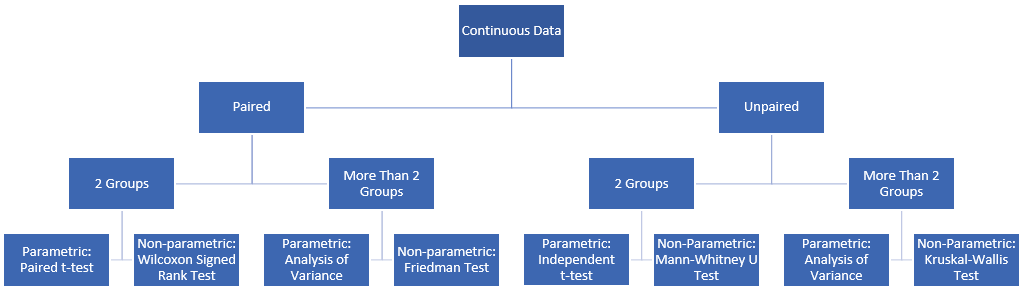

Fonte: https://towardsdatascience.com/hypothesis-testing-with-python-step-by-step-hands-on-tutorial-with-practical-examples-e805975ea96e

## Teste a média de uma população com a variância conhecida

$X_i \sim N(\mu, \sigma^2)$ com $\sigma^2$ conhecido

$X_1, \ldots, X_n$ amostra aleatória 

Considere avaliar

$H_0: \mu = \mu_0$ contra

$H_1: \mu < \mu_0$

$RC = \{\bar{x} \in \mathbb{R}; \bar{x}< x_c\}$

Exemplo

$H_0: \mu =18$ contra

$H_1: \mu<18$

$RC = \{\bar{x} \in \mathbb{R}; \bar{x}< x_c\}$

In [1]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

/home/cibele/anaconda3/lib/python3.7/site-packages/setuptools/_importlib.py:23: UserWarning: `importlib-metadata` version is incompatible with `setuptools`.
This problem is likely to be solved by installing an updated version of `importlib-metadata`.
  warnings.warn(msg)  # Ensure a descriptive message is shown.


In [2]:
# Dados do exercício

mu0 = 18
sigma = 6
n=30
xc = norm.ppf(0.05)*(sigma/np.sqrt(n)) + mu0
                             
print('RC = {xbarra <', np.round(xc,2), '}')

RC = {xbarra < 16.2 }


In [3]:
# xbarra observado e decisão do teste

xbarra = 16

if xbarra < xc: print ('Rejeito H0')

Rejeito H0


In [4]:
# Nível descritivo do teste

z_obs = (xbarra - mu0)/(sigma/np.sqrt(n))

print('valor-p', np.round(norm.cdf(z_obs),3))

valor-p 0.034


## Teste de normalidade dos dados: Shapiro Wilk

#### Atenção! Para usar testes paramétricos, testar a normalidade dos dados antes!

$X_1, \ldots, X_n$ amostra aleatória 

$H_0: X_i \sim Normal$ contra

$H_1:  X_i $ tem outra distribuição


In [5]:
# Fonte: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

from scipy import stats
rng = np.random.default_rng()
x = stats.norm.rvs(loc=5, scale=3, size=100, random_state=rng)
shapiro_test = stats.shapiro(x)
shapiro_test


ShapiroResult(statistic=0.9881118535995483, pvalue=0.51649010181427)

In [6]:
shapiro_test[0]

0.9881118535995483

In [7]:
shapiro_test.pvalue

0.51649010181427

In [8]:
#decisão do teste

if shapiro_test.pvalue < 0.05: print ('Rejeito H0') 
else: print ('Não rejeito H0')

Não rejeito H0


## Teste a média de uma população com a variância desconhecida

$X_i \sim N(\mu, \sigma^2)$ com $\sigma^2$ desconhecido

$X_1, \ldots, X_n$ amostra aleatória 

Considere avaliar

$H_0: \mu =\mu_0$ contra

$H_1: \mu>\mu_0$

$RC = \{T \in \mathbb{R}; T > t_c\}$

Exemplo:

$H_0: \mu =30$ contra

$H_1: \mu>30$


In [9]:
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Dados do exercício

mu0 = 30
s = 3
n=25

tc = mu0-t.ppf(0.05, n-1)*(s/np.sqrt(n)) 
                             
print('RC = {t >', np.round(tc,2), '}')

RC = {t > 31.03 }


In [11]:
# t observado e decisão do teste

tobs = 31.5

if tobs > tc: print ('Rejeito H0')
else: print('Não rejeito H0')

Rejeito H0


In [12]:
# Nível descritivo do teste

print('valor-p', np.round(t.cdf(z_obs, n-1),3))

valor-p 0.04


In [13]:
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# Dados do exercício

mu0 = 0
s = 3
n=25

tc = mu0-t.ppf(0.05, n-1)*(s/np.sqrt(n)) 
                             
print('RC = {xbarra >', np.round(tc,2), '}')

RC = {xbarra > 1.03 }


In [15]:
# t observado e decisão do teste

tobs = 31.5

if tobs > tc: print ('Rejeito H0')
else: print('Não rejeito H0')

Rejeito H0


In [16]:
# Nível descritivo do teste

print('valor-p', np.round(t.cdf(z_obs, n-1),3))

valor-p 0.04


## Notas reais e declaradas - Teste T pareado

In [17]:
import pandas as pd

dados = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/IntroducaoaInferenciaEstatistica/main/Dados/NotasP1.csv', decimal=',', index_col=0, sep=';',na_values='-')
dados.head()


/home/cibele/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


,Nota P1,Nota declarada
Id Aluno,,
1,0.6,3.0
2,1.6,NaN
3,1.6,1.6
4,2.3,NaN
5,3.0,3.6


In [18]:
dados['Diferença'] = dados['Nota P1']-dados['Nota declarada'] 
np.asarray(dados['Diferença'])

array([-2.4,  nan,  0. ,  nan, -0.6,  nan,  nan,  0.1, -0.4,  nan, -2.7,
       -0.9, -0.6,  1. ,  nan,  2.7,  1.9, -0.7,  2. ,  0.4, -1.5,  1.3,
        1.6,  1. , -0.7,  nan,  nan,  3.3,  0. , -0.5,  0.5,  3.2, -0.6,
        1.7,  1.3,  1.4,  1. ])

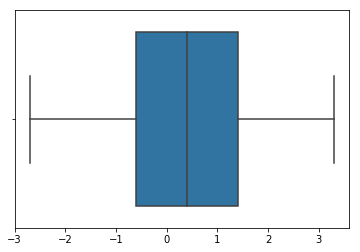

In [19]:
import seaborn as sns
sns.boxplot(x=dados['Nota P1']-dados['Nota declarada'])

In [20]:
# dados empilhados - outra possibilidade para realizar o teste t-pareado

df1 = pd.DataFrame(dados['Nota P1'])
df1.rename(columns={'Nota P1': 'Nota'}, inplace=True)
df1['Tipo'] = 'Nota P1'

df2 = pd.DataFrame(dados['Nota declarada'])
df2.rename(columns={'Nota declarada': 'Nota'}, inplace=True)
df2['Tipo'] = 'Nota declarada'

dados_empilhados = pd.concat([df1, df2], verify_integrity=True,ignore_index=True)
dados_empilhados

,Nota,Tipo
0,0.6,Nota P1
1,1.6,Nota P1
2,1.6,Nota P1
3,2.3,Nota P1
4,3.0,Nota P1
...,...,...
69,9.4,Nota declarada
70,7.3,Nota declarada
71,7.7,Nota declarada
72,8.0,Nota declarada


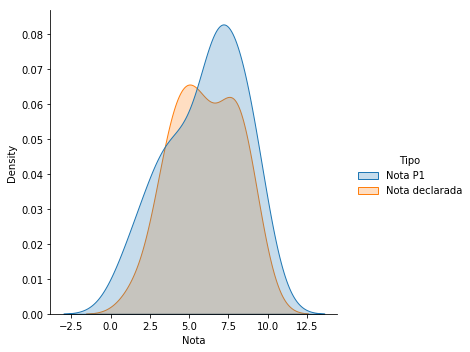

In [21]:
sns.displot(data=dados_empilhados, x='Nota', hue='Tipo', kind='kde', fill=True)

In [22]:
shapiro_test = stats.shapiro(np.asarray(dados['Diferença'].dropna()))
shapiro_test

ShapiroResult(statistic=0.9763895869255066, pvalue=0.7403369545936584)

In [23]:
dados['Diferença'].describe()

count    29.000000
mean      0.441379
std       1.502027
min      -2.700000
25%      -0.600000
50%       0.400000
75%       1.400000
max       3.300000
Name: Diferença, dtype: float64

In [24]:
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np

# Dados do exercício

mu0 = 0
s = 1.5
n = 29

tc = mu0-t.ppf(0.025, n-1)*(s/np.sqrt(n)) 
tc_ = mu0+t.ppf(0.025, n-1)*(s/np.sqrt(n)) 
                             
print('RC = {t <', np.round(tc_,2), 'ou t >', np.round(tc,2), '}')

RC = {t < -0.57 ou t > 0.57 }


In [25]:
# Cálculo da estatística observada
tobs = (0.441379 - 0)/(s/np.sqrt(n))
tobs

1.5845991049388135

In [26]:
if ((tobs > tc) or (tobs < tc_)) : print ('Rejeito H0')
else: print('Não rejeito H0')

Rejeito H0


## Teste t-pareado via comando do pacote scipy


In [27]:
from scipy import stats

dados1 = dados.dropna()

stats.ttest_rel(dados1['Nota P1'], dados1['Nota declarada'], alternative='two-sided')


Ttest_relResult(statistic=1.5824622644302078, pvalue=0.1247755020476031)

## Teste t para populações independentes via comando do pacote scipy

In [28]:
# Fonte: Adaptado de https://towardsdatascience.com/hypothesis-testing-with-python-step-by-step-hands-on-tutorial-with-practical-examples-e805975ea96e

x=[4.57, 4.55, 5.47, 4.67, 5.41, 4.55, 4.53, 5.63, 3.86, 3.97, 4.44, 3.93, 5.31, 5.17, 4.39, 4.28, 5.25]
y = [4.27, 3.93, 4.01, 4.07, 3.87, 4. , 4. , 3.72, 4.16, 4.1 , 3.9 , 3.97, 4.08, 3.96, 3.96, 3.77, 4.09]



In [29]:
# Teste de normalidade para cada amostra

stats.shapiro(x)

ShapiroResult(statistic=0.9251947999000549, pvalue=0.18073347210884094)

In [30]:
stats.shapiro(y)

ShapiroResult(statistic=0.9801783561706543, pvalue=0.9587069153785706)

In [31]:
stats.ttest_ind(x,y)

Ttest_indResult(statistic=5.053219601953828, pvalue=1.7023151261316524e-05)

## Teste Qui-quadrado para independência entre variáveis usando o scipy

In [32]:
# Exemplo: verificar se na Companhia MB o estado civil é independente do grau de instrução

from scipy.stats import chisquare

dados = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/IntroducaoaInferenciaEstatistica/main/Dados/CompanhiaMB.csv', decimal=',', index_col=0, sep=',',na_values='NA')
dados.head()



,estado_civil,instrucao,nfilhos,salario,idade_anos,idade_meses,regiao
funcionario,,,,,,,
1,solteiro,ensino_fundamental,NaN,4.00,26,3,interior
2,casado,ensino_fundamental,1.0,4.56,32,10,capital
3,casado,ensino_fundamental,2.0,5.25,36,5,capital
4,solteiro,ensino_medio,NaN,5.73,20,10,outro
5,solteiro,ensino_fundamental,NaN,6.26,40,7,outro


In [33]:
tab = pd.crosstab(dados['estado_civil'], dados['instrucao'])

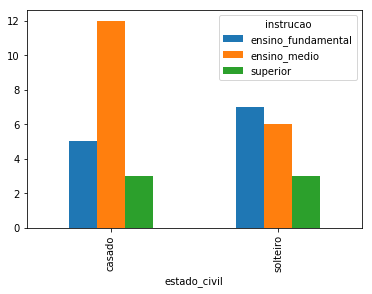

In [34]:
tab.plot.bar()

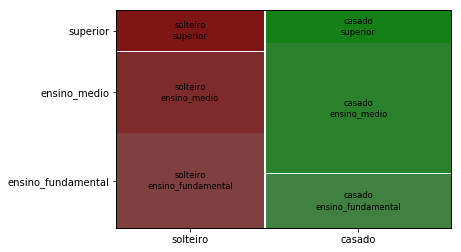

In [35]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(dados, ['estado_civil', 'instrucao']);

In [36]:
tab

instrucao,ensino_fundamental,ensino_medio,superior
estado_civil,,,
casado,5,12,3
solteiro,7,6,3


In [37]:
Q2 = stats.chi2_contingency(tab)
Q2

(1.9125000000000003,
 0.3843314298815499,
 2,
 array([[ 6.66666667, 10.        ,  3.33333333],
        [ 5.33333333,  8.        ,  2.66666667]]))

## Teste Qui-quadrado para homogeneidade usando o scipy

In [38]:
# Exemplo: verificar se na Companhia MB o grau de instrução é homogêneo em diferentes regiões?

tab = pd.crosstab(dados['regiao'], dados['instrucao'], margins='columns', margins_name='Total')
tab


instrucao,ensino_fundamental,ensino_medio,superior,Total
regiao,,,,
capital,4,5,2,11
interior,3,7,2,12
outro,5,6,2,13
Total,12,18,6,36


In [39]:
Q2 = stats.chi2_contingency(tab)
Q2

(0.6614219114219115,
 0.9998996069783075,
 9,
 array([[ 3.66666667,  5.5       ,  1.83333333, 11.        ],
        [ 4.        ,  6.        ,  2.        , 12.        ],
        [ 4.33333333,  6.5       ,  2.16666667, 13.        ],
        [12.        , 18.        ,  6.        , 36.        ]]))

## Teste para variância de uma população

Considere avaliar

$H_0: \sigma^2 = \sigma^2_0$ contra

$H_1: \sigma^2 \neq \sigma^2_0$.

Usamos a estatística baseada na variância amostral observada $s^2$

$v = \displaystyle\frac{(n-1)s^2}{\sigma^2_0}$

$RC = \{v \in \mathbb{R}^+; v < v_{c1} \mbox{  ou  }  v > v_{c2}\}$

In [40]:
from scipy.stats import chi2

# Dados do exercício


s2 = 1.5
sigma2_0 = 1
n = 20
                             
vobs = (n-1) * s2 / sigma2_0 

vc1 = chi2.ppf(0.025, n-1)
vc2 = chi2.ppf(0.975, n-1)
                             
print('RC = {v <', np.round(vc1,2), 'ou v >', np.round(vc2,2), '}')

if ((vobs > vc2) or (vobs < vc1)) : print ('Rejeito H0')
else: print('Não rejeito H0.')

RC = {v < 8.91 ou v > 32.85 }
Não rejeito H0.


## Teste F para igualdade de variâncias de duas populações

Considere avaliar

$H_0: \sigma^2_1 = \sigma^2_2$ contra

$H_1: \sigma^2_1 \neq \sigma^2_2$.

Usamos a estatística baseada nas variâncias amostrais observadas $s^2_1$ e $s^2_2$.

$F = \displaystyle\frac{s^2_1}{s^2_2}$

$RC = \{F \in \mathbb{R}^+; F < f_{c1} \mbox{  ou  }  F > f_{c2}\}$

In [41]:
from scipy.stats import f

# Dados do exercício

s2_1 = 1500
s2_2 = 2500

n1 = 26
n2 = 21
                             
Fobs = s2_1 / s2_2

fc1 = f.ppf(0.025, n1-1, n2-1)
fc2 = f.ppf(0.975, n1-1, n2-1)
                             
print('RC = {F <', np.round(fc1,2), 'ou F >', np.round(fc2,2), '}')                        
print('Fobs=',np.round(Fobs,2))


if ((Fobs > fc2) or (Fobs < fc1)) : print ('Rejeito H0')
else: print('Não rejeito H0.')

RC = {F < 0.43 ou F > 2.4 }
Fobs= 0.6
Não rejeito H0.


## Análise de variância ANOVA

Considere o modelo de ANOVA com um fator 

$$Y_{ij} = \mu_{i} + \epsilon_{ij}, i=1,\ldots,k; j=1,\ldots,m.$$

em que $m$ é o número de observações por grupo e $k$ é o número de grupos.

Queremos avaliar se

$H_0: \mu_1=\mu_2=\ldots \mu_k$ contra

$H_1:$ pelo menos uma média diferente das outras.

Suposições:

- $Y_{ij}$ são v.a.'s independentes
- Todas as k populações tem variâncias iguais $\sigma^2$ (homocedasticidade)
- $Y_{ij}\sim N(\mu, \sigma^2)$ para $i=1,\ldots,k$ e $j=1,\ldots,m$.


Exemplo: Deseja-se avaliar se a média de uma métrica de avaliação de desempenho é a mesma em 4 tipos de máquinas diferentes. Para isso, foram realizados testes em 7 máquinas de cada tipo e a métrica foi calculada.

Podemos usar a função scipy.stats.f_oneway.

In [42]:
import pandas as pd

dados = pd.read_csv('http://raw.githubusercontent.com/cibelerusso/IntroducaoaInferenciaEstatistica/main/Dados/desempenho.csv', sep=';')
dados


,Tipo 1,Tipo 2,Tipo 3,Tipo 4
0,24.9,27.9,38.4,23.8
1,20.4,28.1,38.6,25.3
2,24.2,28.4,41.2,23.5
3,22.3,25.3,43.9,27.6
4,20.3,29.3,40.2,25.5
5,24.2,28.5,40.2,23.9
6,23.5,26.0,37.3,22.6


In [43]:
dados.describe()

,Tipo 1,Tipo 2,Tipo 3,Tipo 4
count,7.000000,7.000000,7.000000,7.000000
mean,22.828571,27.642857,39.971429,24.600000
std,1.874135,1.444365,2.180760,1.665333
min,20.300000,25.300000,37.300000,22.600000
25%,21.350000,26.950000,38.500000,23.650000
50%,23.500000,28.100000,40.200000,23.900000
75%,24.200000,28.450000,40.700000,25.400000
max,24.900000,29.300000,43.900000,27.600000


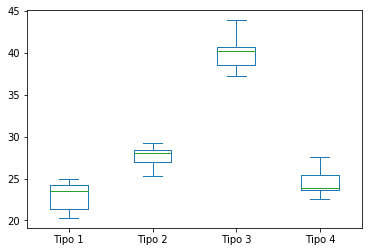

In [44]:
import matplotlib.pyplot as plt

dados.plot.box()

In [45]:
# Verificando a normalidade dos dados

from scipy import stats

shapiro_test, p1 = stats.shapiro(dados['Tipo 1'])
shapiro_test, p2 = stats.shapiro(dados['Tipo 2'])
shapiro_test, p3 = stats.shapiro(dados['Tipo 3'])
shapiro_test, p4 = stats.shapiro(dados['Tipo 4'])

print(p1, p2, p3, p4)

# Vamos supor, para a aplicação do teste, que é razoável supor a normalidade e que os dados tem a mesma variância - 

0.1918213963508606 0.2303459644317627 0.6641761660575867 0.5485301613807678


In [46]:
from scipy.stats import f_oneway

F, p = f_oneway(dados['Tipo 1'], dados['Tipo 2'], dados['Tipo 3'], dados['Tipo 4'])

print(F, p)

127.57033517121309 6.9854128881896056e-15


In [47]:
# Tabela ANOVA - Com base de dados expandida

from statsmodels.formula.api import ols
import statsmodels.api as sm

# Fonte: https://www.reneshbedre.com/blog/anova.html
# reshape the d dataframe suitable for statsmodels package 
dados_melt = pd.melt(dados.reset_index(), id_vars=['index'], value_vars=['Tipo 1', 'Tipo 2', 'Tipo 3', 'Tipo 4'])
# replace column names
dados_melt.columns = ['index', 'Tipo', 'Métrica']
dados_melt

,index,Tipo,Métrica
0,0,Tipo 1,24.9
1,1,Tipo 1,20.4
2,2,Tipo 1,24.2
3,3,Tipo 1,22.3
4,4,Tipo 1,20.3
5,5,Tipo 1,24.2
6,6,Tipo 1,23.5
7,0,Tipo 2,27.9
8,1,Tipo 2,28.1
9,2,Tipo 2,28.4


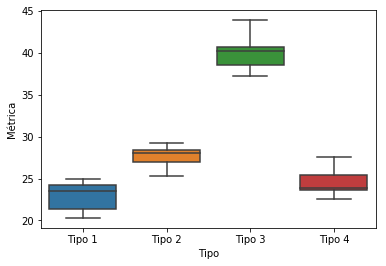

In [48]:
import seaborn as sns

sns.boxplot(data=dados_melt, y='Métrica', x='Tipo')

In [49]:
# Ordinary Least Squares (OLS) model
model = ols('Métrica ~ C(Tipo)', data=dados_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Tipo),1256.021071,3.0,127.570335,6.985413e-15
Residual,78.765714,24.0,NaN,NaN


**Conclusão: Temos fortes evidências na amostra para rejeitar que as médias das métricas podem ser consideradas iguais.**